In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv


## Load the required Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from math import sqrt,log2
# Models

## Load the Datasets

In [3]:
train_df = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv')
test_df= pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv')

In [4]:
train_df.head(5)

,id,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,type_I,Ready To Move,Banashankari 2 nd Stage,3 BHK,1030.0,2.0,2.0,77.25
1,1,type_I,Ready To Move,Balagere,2 BHK,1210.0,2.0,1.0,83.00
2,2,type_I,17-Oct,Banashankari Stage V,3 BHK,1540.0,3.0,2.0,48.51
3,3,type_I,Ready To Move,Thigalarapalya,3 BHK,1830.0,4.0,2.0,135.00
4,4,type_III,Ready To Move,arudi,3 Bedroom,NaN,2.0,0.0,80.00


## Unique Values in the Categorical labels

In [5]:
train_df['area_type'].unique()

array(['type_I', 'type_III', 'type_II', 'type_IV'], dtype=object)

In [6]:
train_df['availability'].unique()

array(['Ready To Move', '17-Oct', '18-Nov', '18-May', '20-Dec', '18-Apr',
       '19-Dec', '19-Jul', '18-Aug', '18-Dec', '19-Aug', '22-Dec',
       '18-Mar', '19-Mar', '19-Jan', '18-Oct', '20-Jul', '18-Sep',
       '18-Jun', '18-Feb', 'Immediate Possession', '17-Jun', '15-Oct',
       '21-Jun', '18-Jul', '17-Dec', '19-Oct', '18-Jan', '17-May',
       '19-Jun', '21-Dec', '19-Sep', '21-Jan', '22-May', '19-Apr',
       '20-Jun', '20-Jan', '22-Jun', '17-Jul', '20-Aug', '22-Jan',
       '16-Sep', '21-Mar', '19-Nov', '20-Apr', '20-Feb', '20-Oct',
       '17-Sep', '17-Nov', '21-May', '21-Oct', '21-Feb', '17-Feb',
       '17-Apr', '21-Sep', '19-Feb', '19-May', '20-Sep', '16-Dec',
       '21-Jul', '17-Aug', '14-Jul', '20-May', '16-Jul', '17-Mar',
       '21-Aug', '15-Nov', '17-Jan', '16-Mar', '21-Nov', '15-Jun',
       '22-Mar', '20-Nov', '20-Mar', '16-Oct', '15-Dec'], dtype=object)

In [7]:
train_df['location'].nunique()

1185

## Data Types

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   area_type     10000 non-null  object 
 2   availability  10000 non-null  object 
 3   location      9999 non-null   object 
 4   size          9987 non-null   object 
 5   total_sqft    9967 non-null   float64
 6   bath          9936 non-null   float64
 7   balcony       9525 non-null   float64
 8   price         10000 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


In [9]:
print("\nData Types:")
print(train_df.dtypes)
print("\nColumn Type Summary:")
print(f"Integer columns: {train_df.select_dtypes(include=['int64']).columns.tolist()}")
print(f"Float columns: {train_df.select_dtypes(include=['float64']).columns.tolist()}")
print(f"Object columns: {train_df.select_dtypes(include=['object']).columns.tolist()}")


Data Types:
id                int64
area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

Column Type Summary:
Integer columns: ['id']
Float columns: ['total_sqft', 'bath', 'balcony', 'price']
Object columns: ['area_type', 'availability', 'location', 'size']


**There are a total of 4 numerical variables excluding the id and 4 categorical variables in the dataset**

In [10]:
train_df.shape

(10000, 9)

**The dataset has 10000 samples with 9 features out of which one of them is the target variable['price'].**

## Numerical Description

In [11]:
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print("\nDescriptive Statistics:")
print(train_df[numerical_cols].describe())


Descriptive Statistics:
                id    total_sqft         bath      balcony         price
count  10000.00000   9967.000000  9936.000000  9525.000000  10000.000000
mean    4999.50000   1570.095822     2.692029     1.585302    113.275879
std     2886.89568   1302.566836     1.274172     0.814347    151.802643
min        0.00000      1.000000     1.000000     0.000000      8.000000
25%     2499.75000   1100.000000     2.000000     1.000000     50.000000
50%     4999.50000   1279.000000     2.000000     2.000000     72.000000
75%     7499.25000   1682.500000     3.000000     2.000000    120.000000
max     9999.00000  52272.000000    18.000000     3.000000   3600.000000


**We can see from the above dataset there is a higher difference between 75% and max for total_sqft and price, explains the presence of outliers.**

## Missing Values

In [12]:
print("\nMissing values in Training Data:")
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])
print(f"\nTotal missing values: {train_df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(train_df.isnull().sum().sum() / (train_df.shape[0] * train_df.shape[1]) * 100):.2f}%")

print("\nMissing values in Test Data:")
missing_test = test_df.isnull().sum()
print(missing_test[missing_test > 0])
print(f"\nTotal missing values: {test_df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(test_df.isnull().sum().sum() / (test_df.shape[0] * test_df.shape[1]) * 100):.2f}%")

print("\nMissing Value Handling Strategy:")
print("- Numerical columns: Will be imputed with median (robust to outliers)")
print("- Categorical columns: Will be imputed with most frequent value")
print("- This will be implemented in the preprocessing pipeline")


Missing values in Training Data:
location        1
size           13
total_sqft     33
bath           64
balcony       475
dtype: int64

Total missing values: 586
Percentage of missing values: 0.65%

Missing values in Test Data:
size            3
total_sqft     13
bath            9
balcony       134
dtype: int64

Total missing values: 159
Percentage of missing values: 0.60%

Missing Value Handling Strategy:
- Numerical columns: Will be imputed with median (robust to outliers)
- Categorical columns: Will be imputed with most frequent value
- This will be implemented in the preprocessing pipeline


## Duplicate Values

In [13]:
duplicates = train_df.duplicated().sum()
print(f"\nNumber of duplicate rows in training data: {duplicates}")

if duplicates > 0:
    print(f"Dropping {duplicates} duplicate rows...")
    train_df = train_df.drop_duplicates()
    print("Duplicates removed successfully!")
    print(f"New training data shape: {train_df.shape}")
else:
    print("No duplicates found in the dataset.")


Number of duplicate rows in training data: 0
No duplicates found in the dataset.


## Outliers in the dataset

In [14]:
# Identify outliers using IQR method
print("\nOutlier Detection using IQR Method:")
outlier_cols = ['total_sqft', 'bath', 'balcony', 'price']
outlier_summary = {}

for col in outlier_cols:
    if col in train_df.columns:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR  # Using 3*IQR for less aggressive removal
        upper_bound = Q3 + 3 * IQR
        
        outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(train_df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        print(f"\n{col}:")
        print(f"  Lower Bound: {lower_bound:.2f}")
        print(f"  Upper Bound: {upper_bound:.2f}")
        print(f"  Outliers detected: {len(outliers)} ({outlier_summary[col]['percentage']:.2f}%)")


Outlier Detection using IQR Method:

total_sqft:
  Lower Bound: -647.50
  Upper Bound: 3430.00
  Outliers detected: 463 (4.63%)

bath:
  Lower Bound: -1.00
  Upper Bound: 6.00
  Outliers detected: 176 (1.76%)

balcony:
  Lower Bound: -2.00
  Upper Bound: 5.00
  Outliers detected: 0 (0.00%)

price:
  Lower Bound: -160.00
  Upper Bound: 330.00
  Outliers detected: 457 (4.57%)


## Visualization

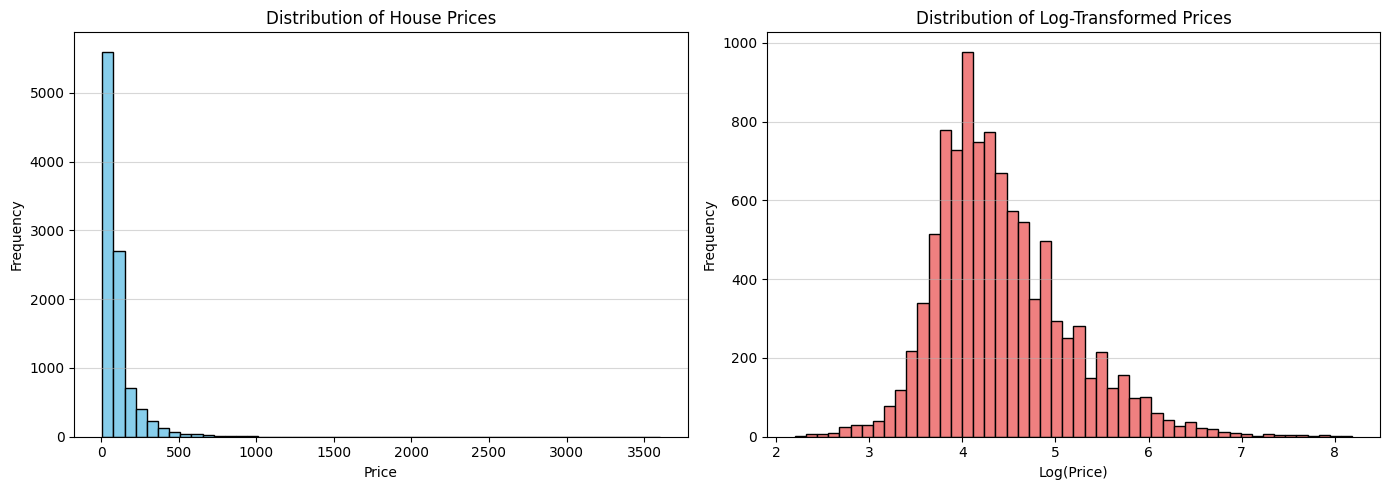


Visualization 1: Price Distribution
The original price data is heavily right-skewed with a clear cluster of expensive properties creating a spike at 
the high end—possibly outliers or a separate high-end segment.
Applying a log transformation makes the price distribution more symmetric and approximately normal, reducing the 
influence of extreme values and making the data better suited for regression modeling.


In [15]:
# Visualization 1: Distribution of Target Variable (Price)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(train_df['price']), bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Prices')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

print("\nVisualization 1: Price Distribution")
print("The original price data is heavily right-skewed with a clear cluster of expensive properties creating a spike at \nthe high end—possibly outliers or a separate high-end segment.\nApplying a log transformation makes the price distribution more symmetric and approximately normal, reducing the \ninfluence of extreme values and making the data better suited for regression modeling.")

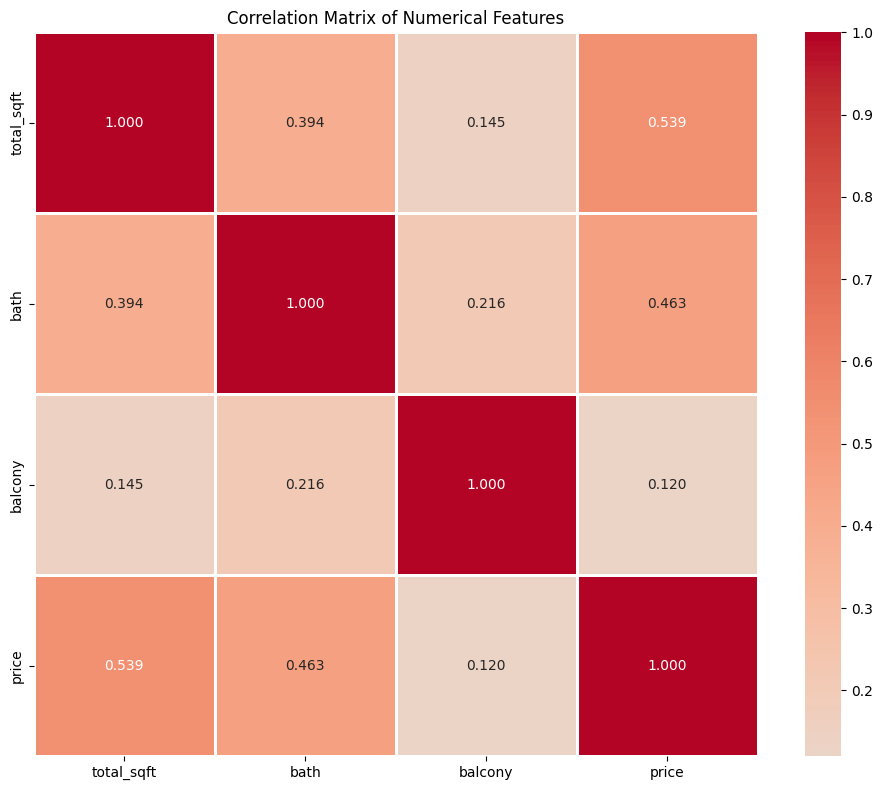


Visualization 2: Correlation Matrix
Insight: 'total_sqft' and 'bath' shows strongest correlation with price (positive).
'balcony' also show moderate positive correlations with price.


In [16]:
# Visualization 2: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_cols = ['total_sqft', 'bath', 'balcony', 'price']
correlation_matrix = train_df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.3f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\nVisualization 2: Correlation Matrix")
print("Insight: 'total_sqft' and 'bath' shows strongest correlation with price (positive).")
print("'balcony' also show moderate positive correlations with price.")

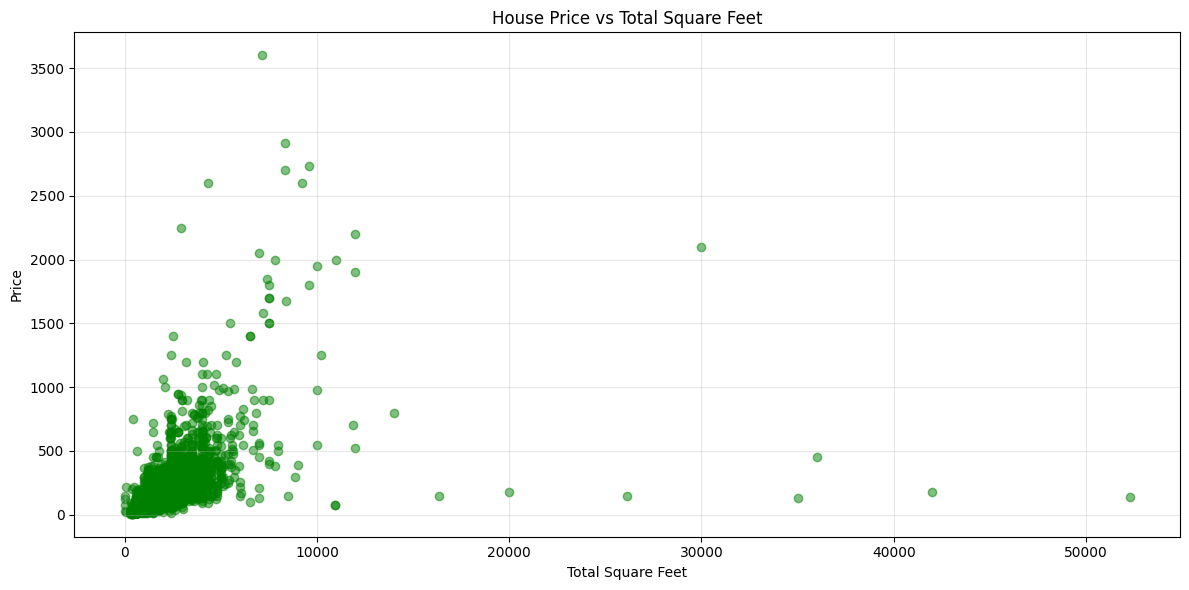


Visualization 3: Price vs Total Sqft
The scatter plot visualizes how house price varies with total square footage.
There is a general upward trend: On average, larger homes tend to have higher prices, indicating a positive 
association between property size and price.
However, the relationship is not perfectly linear—there are many properties with similar square footage but widely differing prices, suggesting the influence of other factors (such as location, amenities, or condition).


In [17]:

# Visualization 3: Price vs Total Sqft
plt.figure(figsize=(12, 6))
plt.scatter(train_df['total_sqft'],train_df['price'], alpha=0.5, color='green')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('House Price vs Total Square Feet')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nVisualization 3: Price vs Total Sqft")
print("The scatter plot visualizes how house price varies with total square footage.\nThere is a general upward trend: On average, larger homes tend to have higher prices, indicating a positive \nassociation between property size and price.\nHowever, the relationship is not perfectly linear—there are many properties with similar square footage but widely differing prices, suggesting the influence of other factors (such as location, amenities, or condition).")

## Feature Engineering

In [18]:
def extract_bedrooms(size_str):
    """Extract number of bedrooms from size string"""
    if pd.isna(size_str):
        return np.nan
    try:
        return float(str(size_str).split()[0])
    except:
        return np.nan

# Apply to both train and test
train_df['size'] = train_df['size'].apply(extract_bedrooms)
test_df['size'] = test_df['size'].apply(extract_bedrooms)

print(f"- Extracted no.of.bedrooms from size column")
print(f"  Train: {train_df['size'].isna().sum()} missing values")
print(f"  Test: {test_df['size'].isna().sum()} missing values")

- Extracted no.of.bedrooms from size column
  Train: 13 missing values
  Test: 3 missing values


In [19]:
def extract_month(availability):
    if '-' in availability:
        return availability.split('-')[1]  # Get month part after dash
    else:
        return availability  # Keep 'Ready To Move' or 'Immediate Possession'

# Apply transformation
train_df['availability'] = train_df['availability'].apply(extract_month)
test_df['availability'] = test_df['availability'].apply(extract_month)
print("Extracted month from availability column")

Extracted month from availability column


In [20]:
train_df['availability'].nunique()

14

In [21]:
test_df['availability'].head(50)

0     Ready To Move
1     Ready To Move
2     Ready To Move
3     Ready To Move
4               Apr
5     Ready To Move
6     Ready To Move
7               Dec
8               Mar
9     Ready To Move
10    Ready To Move
11              Jul
12              Jul
13    Ready To Move
14    Ready To Move
15    Ready To Move
16              Aug
17    Ready To Move
18    Ready To Move
19    Ready To Move
20    Ready To Move
21    Ready To Move
22    Ready To Move
23    Ready To Move
24              Jul
25    Ready To Move
26              Aug
27    Ready To Move
28              Dec
29    Ready To Move
30    Ready To Move
31              Mar
32    Ready To Move
33    Ready To Move
34    Ready To Move
35    Ready To Move
36    Ready To Move
37    Ready To Move
38              Jul
39              Aug
40    Ready To Move
41    Ready To Move
42    Ready To Move
43    Ready To Move
44              Apr
45    Ready To Move
46    Ready To Move
47    Ready To Move
48    Ready To Move
49    Ready To Move


In [22]:
train_df['availability'].head(50)

0     Ready To Move
1     Ready To Move
2               Oct
3     Ready To Move
4     Ready To Move
5     Ready To Move
6     Ready To Move
7     Ready To Move
8     Ready To Move
9     Ready To Move
10    Ready To Move
11    Ready To Move
12    Ready To Move
13    Ready To Move
14    Ready To Move
15    Ready To Move
16              Nov
17    Ready To Move
18    Ready To Move
19              May
20              May
21    Ready To Move
22              Dec
23    Ready To Move
24    Ready To Move
25    Ready To Move
26              Apr
27    Ready To Move
28    Ready To Move
29    Ready To Move
30    Ready To Move
31    Ready To Move
32    Ready To Move
33              Dec
34    Ready To Move
35              Dec
36    Ready To Move
37    Ready To Move
38    Ready To Move
39              May
40              Jul
41    Ready To Move
42    Ready To Move
43    Ready To Move
44    Ready To Move
45              Aug
46    Ready To Move
47    Ready To Move
48    Ready To Move
49    Ready To Move


In [23]:
numerical_features = ['total_sqft', 'bath', 'balcony', 'size']
categorical_features = ['area_type', 'availability', 'location']

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Prepare X and y for training
feature_cols = numerical_features + categorical_features
X = train_df[feature_cols].copy()
y = train_df['price'].copy()
X_test = test_df[feature_cols].copy()

print(f"\nTraining data shape: {X.shape}")
print(f"Test data shape: {X_test.shape}")



Numerical features: ['total_sqft', 'bath', 'balcony', 'size']
Categorical features: ['area_type', 'availability', 'location']

Training data shape: (10000, 7)
Test data shape: (3320, 7)


In [24]:
high_cat_cols = [] # for target-encoding
low_cat_cols = [] # for one-hot-encoding
for i in train_df.columns: 
    if train_df[i].dtype == 'object':
        if train_df[i].nunique() > 15:
            high_cat_cols.append(i)
        else:
            low_cat_cols.append(i)

In [25]:
low_cat_cols

['area_type', 'availability']

**The categorical labels have been classified into 'high_cat_cols', where the no.of.unique values is greater than 15 and 'low_cat_cols', where no.of.unique values is less than 15.
This helps in categorizing the encoding to TargetEncoding and OneHotEncoding respectively.**

## Train-Test split for Model Evaluation

In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((8000, 7), (2000, 7), (8000,), (2000,))

## Data Preprocessing 

In [27]:
# Create preprocessing pipelines for numerical and categorical features
imputer_transformer = ColumnTransformer([
    ('median_imputer', SimpleImputer(strategy='median',missing_values=np.nan),['balcony','bath','size','total_sqft']),
    ('mode_imputer',SimpleImputer(strategy='most_frequent',missing_values=np.nan),['location'])
],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

encode_transformer = ColumnTransformer([('target_enc', TargetEncoder(),high_cat_cols),
                                        ('ohe',OneHotEncoder(sparse_output=False),low_cat_cols)]
                                       ,remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

scale_transformer=ColumnTransformer([('scaler',StandardScaler(), 
        numerical_features)],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

preprocessor=Pipeline([
        ('imp', imputer_transformer),
        ('enc', encode_transformer),
        ('scale',scale_transformer)]).set_output(transform='pandas')

**The imputer transformer transforms missing values with the imputed values specified for each columns/features.
Categorical features are passed to encode_transformer for ease of calculation.
Numerical features are scaled with the help of StandardScaler.
All these column transformers are passed into a pipeline.**

In [28]:
preprocessor.fit(X_train, y_train)


Pipeline(steps=[('imp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['balcony', 'bath', 'size',
                                                   'total_sqft']),
                                                 ('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['location'])],
                                   verbose_feature_names_out=False)),
                ('enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_enc', TargetEncoder(),
                                                  ['location']),
                                                 ('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type',
                                                   'availability'])],
                                   verbose_feature_names_out=False)),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['total_sqft', 'bath',
                                                   'balcony', 'size'])],
                                   verbose_feature_names_out=False))])

In [29]:

# Transform train and test features
X_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [30]:
X_transformed.shape

(8000, 23)

In [31]:
X_transformed

,total_sqft,bath,balcony,size,location,area_type_type_I,area_type_type_II,area_type_type_III,area_type_type_IV,availability_Apr,...,availability_Immediate Possession,availability_Jan,availability_Jul,availability_Jun,availability_Mar,availability_May,availability_Nov,availability_Oct,availability_Ready To Move,availability_Sep
9254,-0.312402,-0.539659,-0.754728,-0.659964,108.740840,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1561,1.621813,-0.539659,-0.754728,0.978681,165.894924,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1670,-0.312402,0.245157,0.498193,0.978681,149.300284,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6087,-0.083931,0.245157,0.498193,0.159358,102.756180,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6669,-0.009504,0.245157,0.498193,0.159358,102.958083,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.726103,1.029972,1.751114,1.798004,71.042068,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5191,0.065787,0.245157,1.751114,0.159358,120.413597,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,-0.818673,-1.324474,-0.754728,-1.479287,98.261088,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,-0.070084,0.245157,-0.754728,0.159358,106.386162,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
X_val=preprocessor.transform(X_val)

## Models

In [33]:
model_metric = {}
fitted_model = {}

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM Regressor": LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1),
}

## Evaluation of models with r2 score

In [34]:
for model_name, model in models.items():
    print(f"---Training {model_name}---")
    model.fit(X_transformed, y_train)
    fitted_model[model_name] = model

    valid_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, valid_pred))
    r2 = r2_score(y_val, valid_pred)
    model_metric[model_name] = {"R2": r2, "RMSE": rmse}

    print(f"RMSE: {rmse:.3f}\nR2: {r2:.4f}\n")

---Training Linear Regression---
RMSE: 110.704
R2: 0.3166

---Training Ridge Regression---
RMSE: 110.674
R2: 0.3170

---Training Lasso Regression---
RMSE: 109.676
R2: 0.3293

---Training Random Forest Regressor---
RMSE: 79.270
R2: 0.6496

---Training Gradient Boosting Regressor---
RMSE: 79.380
R2: 0.6487

---Training XGBoost Regressor---
RMSE: 79.460
R2: 0.6479

---Training LightGBM Regressor---
RMSE: 78.590
R2: 0.6556



## Parameters for GridSearch

In [35]:
params = {
    "Random Forest Regressor": {
        'n_estimators': [50, 100],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    "XGBoost Regressor": {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    "LightGBM Regressor": {
        'n_estimators': [50],
        'learning_rate': [0.05],
        'num_leaves': [20]
    }
}

## Hyperparameter Tuning

In [36]:
for model_name, param in params.items():
    print(f"---Tuning {model_name}---")
    model = models[model_name]
    grid_search = GridSearchCV(model, param, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)
    grid_search.fit(X_transformed, y_train)
    tuned_model = grid_search.best_estimator_
    
    # Use the same key format for both dictionaries
    tuned_key = f"{model_name} (tuned)"
    fitted_model[tuned_key] = tuned_model  # Changed this line
    valid_pred = tuned_model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, valid_pred))
    r2 = r2_score(y_val, valid_pred)
    model_metric[tuned_key] = {"R2": r2, "RMSE": rmse}
    print(f"{grid_search.best_params_}\n")

---Tuning Random Forest Regressor---
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

---Tuning XGBoost Regressor---
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

---Tuning LightGBM Regressor---
{'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 20}



## Model Comparison

In [37]:
performance_df = pd.DataFrame(model_metric).T.sort_values(by='RMSE')
performance_df

,R2,RMSE
XGBoost Regressor (tuned),0.677540,76.046503
LightGBM Regressor,0.655609,78.590002
Random Forest Regressor,0.649624,79.269972
Random Forest Regressor (tuned),0.649624,79.269972
Gradient Boosting Regressor,0.648653,79.379742
XGBoost Regressor,0.647946,79.459518
LightGBM Regressor (tuned),0.636300,80.763056
Lasso Regression,0.329285,109.675659
Ridge Regression,0.317015,110.674344
Linear Regression,0.316648,110.704100


In [38]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit on preprocessed data
grid_search.fit(X_transformed, y_train)

# Store tuned model with a different key
fitted_model['XGBoost Regressor (tuned)'] = grid_search.best_estimator_

# Now you can access it
best_model = fitted_model['XGBoost Regressor (tuned)']
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.7301024379573346


## Combining X_transformed with X_val and y_train with y_val

In [39]:
full_x = pd.concat([X_transformed,X_val], axis=0)
full_y = pd.concat([y_train, y_val], axis=0)

## Selecting Final Model

In [40]:
best_model= fitted_model[performance_df.index[1]]
print(best_model)

LGBMRegressor(n_jobs=-1, random_state=42, verbosity=-1)


## Training the dataset using the final model

In [41]:
best_model.fit(full_x, full_y)

LGBMRegressor(n_jobs=-1, random_state=42, verbosity=-1)

## Predict the test dataset

In [42]:
test_pred = best_model.predict(X_test_transformed)
test_pred = np.clip(test_pred, 0, None)

## Submission

In [43]:
submission = pd.DataFrame({
    "id": range(X_test_transformed.shape[0]),
    "price": test_pred
})
submission.to_csv("submission.csv", index=False)
submission

,id,price
0,0,53.067325
1,1,117.734787
2,2,62.332100
3,3,135.185068
4,4,150.050556
...,...,...
3315,3315,36.906265
3316,3316,45.859095
3317,3317,59.817343
3318,3318,57.658417
